In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
torch.manual_seed(0)

# dataset
N = 1000
X = torch.randn(N, 2)
true_w = torch.tensor([2.0, -3.0])
true_b = 0.5

y = (X @ true_w + true_b > 0).float().view(-1,1)

In [4]:
w = torch.randn(2, 1, requires_grad=True)
b=  torch.zeros(1, requires_grad=True)

In [10]:
def sigmoid(z):
    return 1/(1+torch.exp(-z))

def model(X):
    return sigmoid(X@w+b)

def bce(y_hat, y):
    eps=1e-7
    loss =  -(y * torch.log(y_hat + eps) + (1-y) * torch.log(1-y_hat+eps))
    return loss.mean()

Epoch 0 | Loss: 1.3250
Epoch 1 | Loss: 1.2853
Epoch 2 | Loss: 1.2465
Epoch 3 | Loss: 1.2088
Epoch 4 | Loss: 1.1722
Epoch 5 | Loss: 1.1366
Epoch 6 | Loss: 1.1021
Epoch 7 | Loss: 1.0687
Epoch 8 | Loss: 1.0364
Epoch 9 | Loss: 1.0053
Epoch 10 | Loss: 0.9752
Epoch 11 | Loss: 0.9463
Epoch 12 | Loss: 0.9185
Epoch 13 | Loss: 0.8918
Epoch 14 | Loss: 0.8662
Epoch 15 | Loss: 0.8417
Epoch 16 | Loss: 0.8182
Epoch 17 | Loss: 0.7958
Epoch 18 | Loss: 0.7744
Epoch 19 | Loss: 0.7540
Epoch 20 | Loss: 0.7345
Epoch 21 | Loss: 0.7159
Epoch 22 | Loss: 0.6982
Epoch 23 | Loss: 0.6814
Epoch 24 | Loss: 0.6654
Epoch 25 | Loss: 0.6501
Epoch 26 | Loss: 0.6356
Epoch 27 | Loss: 0.6218
Epoch 28 | Loss: 0.6087
Epoch 29 | Loss: 0.5962
Epoch 30 | Loss: 0.5843
Epoch 31 | Loss: 0.5730
Epoch 32 | Loss: 0.5623
Epoch 33 | Loss: 0.5520
Epoch 34 | Loss: 0.5422
Epoch 35 | Loss: 0.5329
Epoch 36 | Loss: 0.5240
Epoch 37 | Loss: 0.5155
Epoch 38 | Loss: 0.5074
Epoch 39 | Loss: 0.4996
Epoch 40 | Loss: 0.4922
Epoch 41 | Loss: 0.4851
Ep

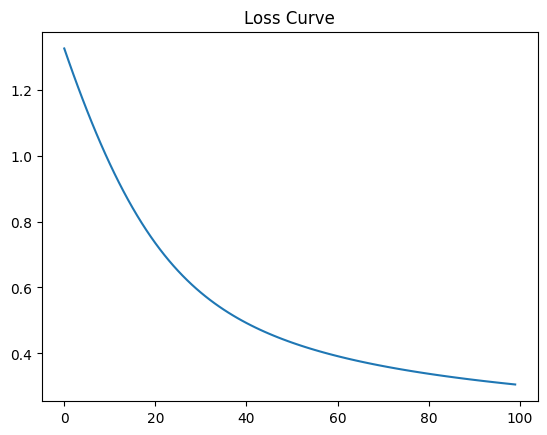

In [11]:
lr = 0.1
losses = []

for epoch in range(100):
    y_hat = model(X)
    loss = bce(y_hat, y)

    loss.backward()

    with torch.no_grad():
        w -= lr*w.grad
        b -= lr*b.grad
        w.grad.zero_()
        b.grad.zero_()

    losses.append(loss.item())
    print(f"Epoch {epoch} | Loss: {loss.item():.4f}")

plt.plot(losses)
plt.title("Loss Curve")
plt.show()